## Proyecto Marketing Analytics para empresa Fintech

## DESCRIPCIÓN DEL PROYECTO

Análisis de los datos de campañas de marketing de una empresa Fintech para
conseguir identificar patrones, tendencias y factores que influyen en que un
cliente acabe contratando un depósito. Tras un análisis exhaustivo de todos sus
datos, habrá que implementar un modelo simple que ayude a entender y predecir
la efectividad de las campañas de marketing, y diseñar un dashboard para la
capa ejecutiva de la fintech con los principales insights y KPIs de los resultados
de las campañas.

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import utils

# Expresiones regulares
import re
from fuzzywuzzy import process

c:\Users\dgdel.DESKTOP-MAOSMM4\anaconda3\envs\test\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv('bank-additional_bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 1.Análisi de datos

### Revisión general de los datos

In [3]:
df.shape
print('el numero de filas en los datos son:',df.shape[0])
print('el numero de columnas en los datos son:',df.shape[1])

el numero de filas en los datos son: 41188
el numero de columnas en los datos son: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# nombre y tipo de datos de las columnas
pd.DataFrame(df.dtypes)

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [6]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32396,33,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
21595,49,blue-collar,married,basic.9y,unknown,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
28423,30,self-employed,single,university.degree,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,yes
25377,42,self-employed,divorced,professional.course,no,yes,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
39789,39,admin.,married,high.school,no,yes,no,cellular,jun,tue,...,2,999,1,failure,-1.7,94.055,-39.8,0.702,4991.6,no


### Tipos de variables

In [8]:

print('cuantas columnas hay de cada tipo? ')
df.dtypes.value_counts()

cuantas columnas hay de cada tipo? 


object     11
int64       5
float64     5
Name: count, dtype: int64

In [9]:
print('valores unicos de las columnas:')
df.nunique()

valores unicos de las columnas:


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [10]:
df_numericas = df.select_dtypes(include="number")
df_categoricas = df.select_dtypes(exclude="number")


print("Variables numéricas:")
print(list(df_numericas.columns))
print('##########################################################################################################')
print("Variables categóricas:")
print(list(df_categoricas.columns))


Variables numéricas:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
##########################################################################################################
Variables categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [11]:

print("Estadísticas descriptivas (numéricas):")
df_numericas.describe()
    

Estadísticas descriptivas (numéricas):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
print("Estadísticas descriptivas (categóricas):")
df_categoricas.describe()

Estadísticas descriptivas (categóricas):


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [14]:
df[df.job == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,unknown,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,unknown,divorced,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,unknown,married,unknown,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,unknown,married,unknown,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,unknown,divorced,unknown,unknown,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,unknown,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [15]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [17]:
df[df.marital == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [18]:
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [19]:
df.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [20]:
df.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [21]:
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [22]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [23]:
### hacer un orden de los meses

In [24]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [25]:
#FALTAN LOS VALORES FECHA?

### DATOS --> Valores nulos y/o faltantes y duplicados

In [26]:
utils.identificacion_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 12
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "age": 469
Número de outliers en la columna "duration": 2963
Número de outliers e

In [27]:
print('la información duplicada que tenemos:')
df[df.duplicated()]

la información duplicada que tenemos:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [28]:
df.drop_duplicates(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
# AQUI FALTAN LOS VALORES UNKNOW

In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [32]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [33]:
df.duration.value_counts()

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64

In [34]:
df.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [35]:
df.pdays.value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

### Estadistica  Descriptiva NUMERICA

In [36]:
df_numericas

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [37]:
px.histogram(df, x="age", nbins=20)

In [38]:
px.box(df, y="duration")

In [39]:
px.histogram(df,x='campaign',nbins=100)

In [40]:
px.histogram(df,x='pdays',nbins=100)

In [41]:
px.violin(df, y='euribor3m')

### Estadistica  Descriptiva Categorica

In [42]:
df_categoricas

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


<Axes: xlabel='count', ylabel='education'>

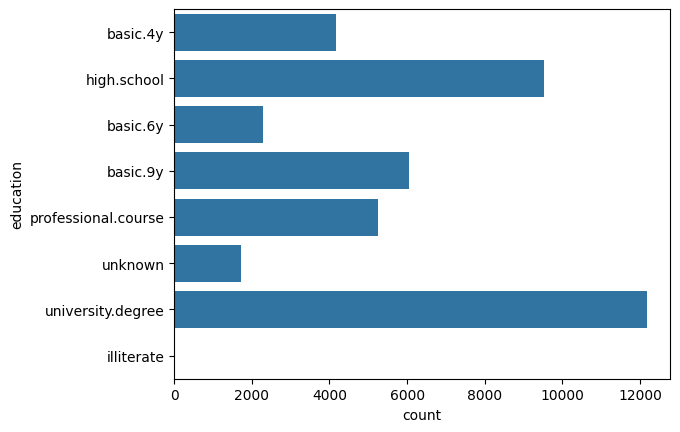

In [43]:
sns.countplot(y='education', data=df)

<Axes: xlabel='count', ylabel='marital'>

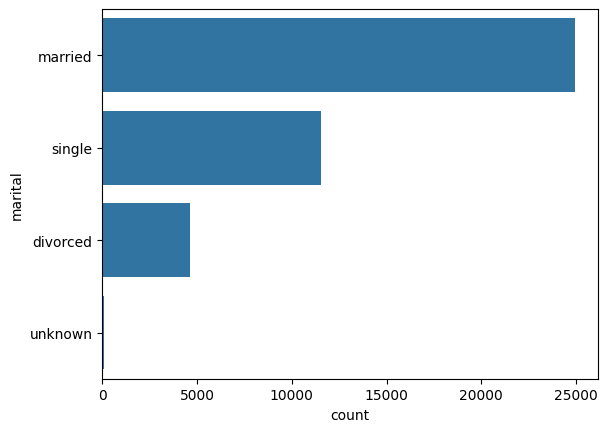

In [44]:
sns.countplot(y='marital', data=df)

<Axes: xlabel='count', ylabel='job'>

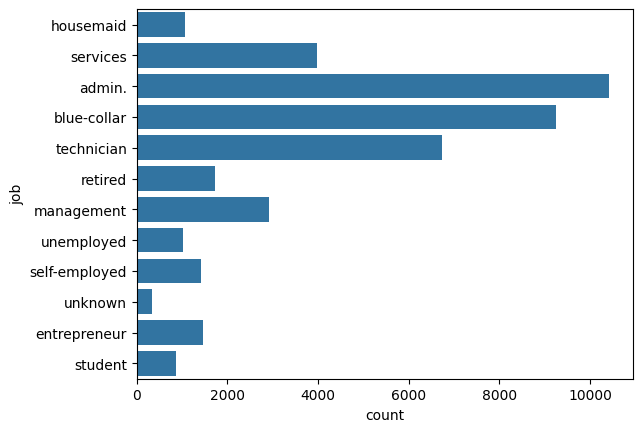

In [45]:
sns.countplot(y='job', data=df)

<Axes: xlabel='month', ylabel='count'>

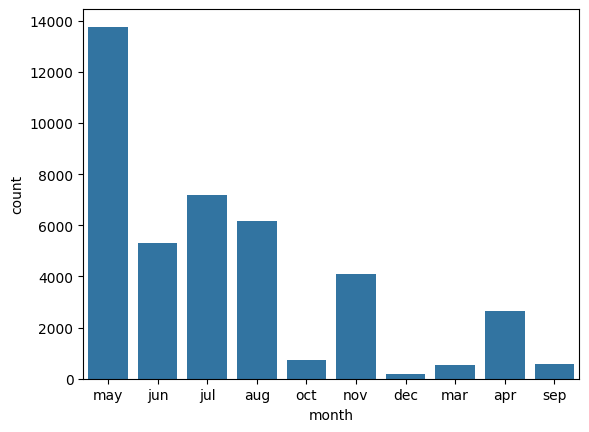

In [46]:
sns.countplot(x='month', data=df)

<Axes: xlabel='day_of_week', ylabel='count'>

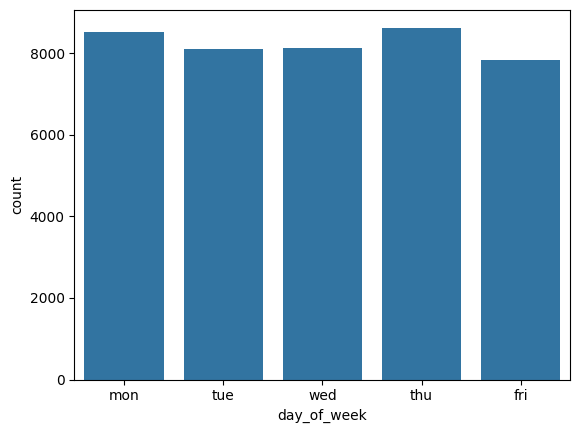

In [47]:
sns.countplot(x='day_of_week', data=df)

### Numerico VS Numerico

In [48]:
df_numericas.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [49]:
px.scatter(df, x='age', y='campaign')

In [50]:
px.scatter(df, x='previous', y='campaign')

In [51]:
px.scatter(df, x='euribor3m', y='campaign')

In [52]:
px.scatter(df, x='cons.price.idx', y='campaign')

In [53]:
px.scatter(df, x='nr.employed', y='euribor3m')

### Numerica vs Categorica

<Axes: xlabel='age', ylabel='education'>

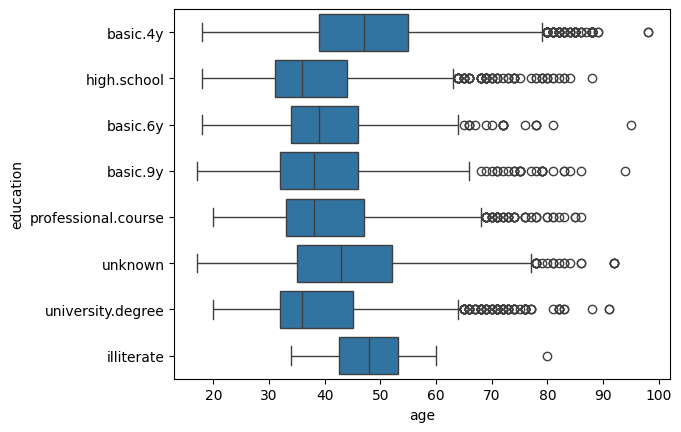

In [54]:
sns.boxplot(x='age', y='education', data=df)

<Axes: xlabel='age', ylabel='job'>

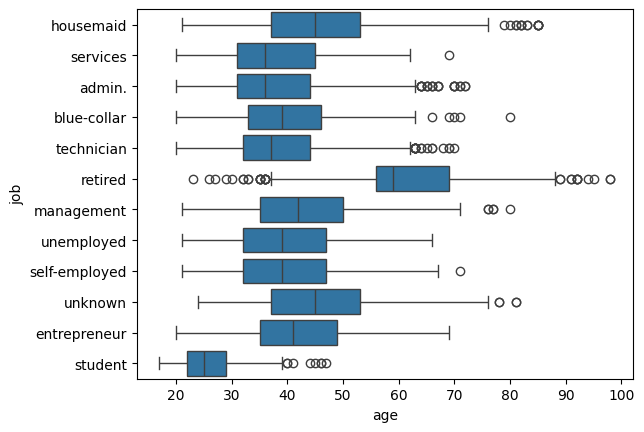

In [55]:
sns.boxplot(x='age', y='job', data=df)

<Axes: xlabel='duration', ylabel='y'>

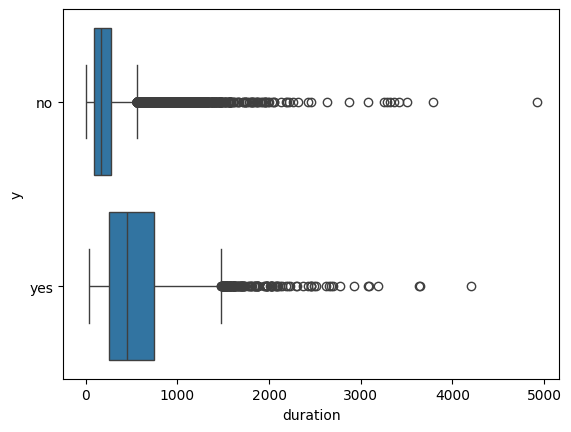

In [56]:
sns.boxplot(x='duration', y='y', data=df)

<Axes: xlabel='campaign', ylabel='y'>

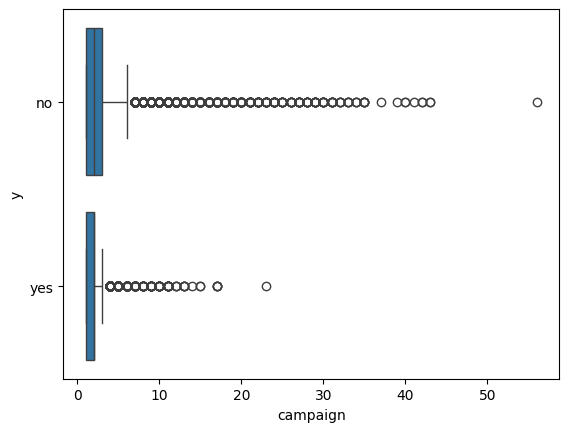

In [57]:
sns.boxplot(x='campaign', y='y', data=df)

<Axes: xlabel='euribor3m', ylabel='y'>

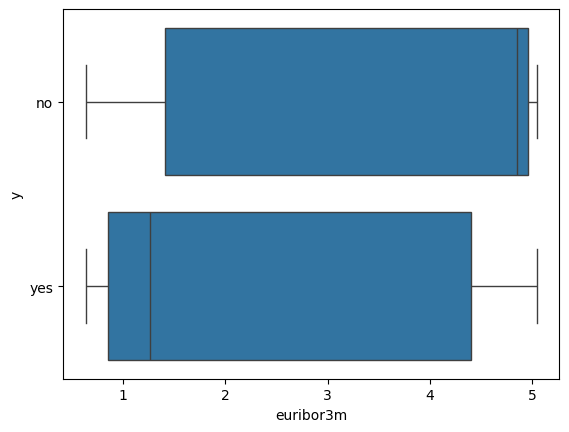

In [58]:
sns.boxplot(x='euribor3m', y='y', data=df)

<Axes: xlabel='nr.employed', ylabel='y'>

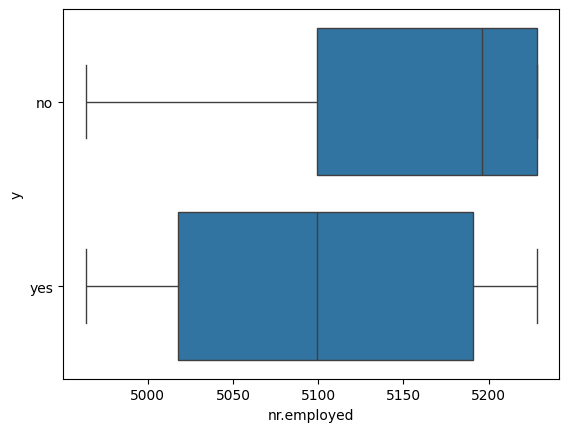

In [59]:
sns.boxplot(x='nr.employed', y='y', data=df)

### Categorica vs Categorica

In [60]:
pd.crosstab(df['job'] , df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [61]:
pd.crosstab(df['job'] , df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [62]:
pd.crosstab(df['housing'] , df['loan'])

loan,no,unknown,yes
housing,,,
no,16065,0,2557
unknown,0,990,0
yes,17885,0,3691


In [63]:
pd.crosstab(df['contact'] , df['month'])

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
contact,,,,,,,,,,
cellular,2445,5909,149,6096,820,486,5518,3676,563,482
telephone,187,269,33,1078,4498,60,8251,425,155,88


In [64]:
pd.crosstab(df['y'] , df['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


In [65]:
pd.crosstab(df['y'] , df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480
yes,428,188,473,1031,4,595,1670,251


In [66]:
pd.crosstab(df['y'] , df['marital'])

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


In [67]:
pd.crosstab(df['y'] , df['contact'])

contact,cellular,telephone
y,,
no,22291,14257
yes,3853,787


In [68]:
pd.crosstab(df['y'] , df['month'])

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,2093,5523,93,6525,4759,270,12883,3685,403,314
yes,539,655,89,649,559,276,886,416,315,256


In [69]:
pd.crosstab(df['y'] , df['poutcome'])

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


### OUTLIERS

In [70]:
utils.limites_outliers(df, 'age')

Valor del segundo cuartil (25%): 32.00
Valor del tercer cuartil (75%): 47.00
Valor del rango intercuartil (IQR): 15.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 9.50
	 - Límite superior (considerado extremadamente alto): 69.50


(np.float64(9.5), np.float64(69.5))

In [71]:
utils.limites_outliers(df, 'duration') # NO eliminar, igual si la llamada es muy larga, puede que interese

Valor del segundo cuartil (25%): 102.00
Valor del tercer cuartil (75%): 319.00
Valor del rango intercuartil (IQR): 217.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): -223.50
	 - Límite superior (considerado extremadamente alto): 644.50


(np.float64(-223.5), np.float64(644.5))

In [72]:
utils.limites_outliers(df, 'campaign')

Valor del segundo cuartil (25%): 1.00
Valor del tercer cuartil (75%): 3.00
Valor del rango intercuartil (IQR): 2.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): -2.00
	 - Límite superior (considerado extremadamente alto): 6.00


(np.float64(-2.0), np.float64(6.0))

In [73]:
utils.limites_outliers(df, 'pdays')

Valor del segundo cuartil (25%): 999.00
Valor del tercer cuartil (75%): 999.00
Valor del rango intercuartil (IQR): 0.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 999.00
	 - Límite superior (considerado extremadamente alto): 999.00


(np.float64(999.0), np.float64(999.0))

In [74]:
utils.limites_outliers(df, 'previous')

Valor del segundo cuartil (25%): 0.00
Valor del tercer cuartil (75%): 0.00
Valor del rango intercuartil (IQR): 0.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): 0.00
	 - Límite superior (considerado extremadamente alto): 0.00


(np.float64(0.0), np.float64(0.0))

### INSIGNTS--> ESCOGER PREGUNTAS Y LAS GRAFICAS QUE LAS RESPONDAN

In [75]:
### saber que eliminar (?)